<a href="https://colab.research.google.com/github/hamzamukhi/REAL-ESTATE-PRICE-PREDICTION-/blob/main/Karachi_House_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import seaborn as sns

In [ ]:
%cd /content/gdrive/My Drive/AI LAB

/content/gdrive/My Drive/AI LAB


In [ ]:
df1 = pd.read_csv('Karachi_House_Data.csv')
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Appartment,19-Dec,DHA Defence,2 BHK,1056,2.0,1.0,39.07
1,Plot,Ready To Move,North Nazimabad,4 Bedroom,2600,5.0,3.0,120.00
2,House,Ready To Move,Saddar Town,3 BHK,1440,2.0,3.0,62.00
3,Appartment,Ready To Move,Gulshan-e-Iqbal Town,3 BHK,1521,3.0,1.0,95.00
4,Appartment,Ready To Move,Tariq Road,2 BHK,1200,2.0,1.0,51.00


In [ ]:
#no of rows and no of columns
df1.shape

(13320, 8)

In [ ]:
#area type feature by count of data sample
df1.groupby('area_type')['area_type'].agg('count')

area_type
Appartment      8790
Carpet  Area      87
House           2418
Plot            2025
Name: area_type, dtype: int64

In [ ]:
df2 = df1.drop(['area_type','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,DHA Defence,2 BHK,1056,2.0,39.07
1,North Nazimabad,4 Bedroom,2600,5.0,120.00
2,Saddar Town,3 BHK,1440,2.0,62.00
3,Gulshan-e-Iqbal Town,3 BHK,1521,3.0,95.00
4,Tariq Road,2 BHK,1200,2.0,51.00


In [ ]:
#will tell you no. rows where colums value is null
df2.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
#find that it doesnt have any NA values
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df3.shape

(13247, 5)

In [ ]:
#pandas series will give you unique values
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 Bedroom', '8 Bedroom', '2 Bedroom', '7 Bedroom',
       '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK', '9 BHK',
       '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom', '10 BHK',
       '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK', '12 Bedroom',
       '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
#creating bhk coumn in this column based on size and apply string function by python lambda funct e.g [x is 2BHK] split string using space
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,DHA Defence,2 BHK,1056,2.0,39.07,2
1,North Nazimabad,4 Bedroom,2600,5.0,120.00,4
2,Saddar Town,3 BHK,1440,2.0,62.00,3
3,Gulshan-e-Iqbal Town,3 BHK,1521,3.0,95.00,3
4,Tariq Road,2 BHK,1200,2.0,51.00,2


In [ ]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df3[(df3.bhk>20)]

,location,size,total_sqft,bath,price,bhk
1718,Khayaban-e-Sehar,27 BHK,8000,27.0,230.0,27
4684,Gulshan-E-Iqbal one,43 Bedroom,2400,40.0,660.0,43


2400 is  an error you cannot have this with 43 bedrooms so we will clean up this errors

In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
#it will convert range into single number by avg and by funt it wil detect the value in total_sqft the value is float or not
def is_float(x):
    try:
        float(x)
    except:
      return False
    return True

In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Navy Housing Scheme Karsaz,4 BHK,2100 - 2850,4.0,186.000,4
122,Malir,4 BHK,3067 - 8156,4.0,477.000,4
137,Defence Garden,2 BHK,1042 - 1105,2.0,54.005,2
165,North Karachi,2 BHK,1145 - 1340,2.0,43.490,2
188,Khayaban-e-Bahria,2 BHK,1015 - 1540,2.0,56.800,2


In [ ]:
#apply is_float function it will return true,its a negate operation will return dataset back
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Navy Housing Scheme Karsaz,4 BHK,2100 - 2850,4.0,186.000,4
122,Malir,4 BHK,3067 - 8156,4.0,477.000,4
137,Defence Garden,2 BHK,1042 - 1105,2.0,54.005,2
165,North Karachi,2 BHK,1145 - 1340,2.0,43.490,2
188,Khayaban-e-Bahria,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,PECHS,2 BHK,850 - 1060,2.0,38.190,2
12990,Khayaban-e-Rahat,3 BHK,1804 - 2273,3.0,122.000,3
13059,Gulistan-e-Jauhar,2 BHK,1200 - 1470,2.0,72.760,2
13265,DHA Defence,2 BHK,1133 - 1384,2.0,59.135,2


In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head()  #for few values

,location,size,total_sqft,bath,price,bhk
30,Navy Housing Scheme Karsaz,4 BHK,2100 - 2850,4.0,186.000,4
122,Malir,4 BHK,3067 - 8156,4.0,477.000,4
137,Defence Garden,2 BHK,1042 - 1105,2.0,54.005,2
165,North Karachi,2 BHK,1145 - 1340,2.0,43.490,2
188,Khayaban-e-Bahria,2 BHK,1015 - 1540,2.0,56.800,2


In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head(10)    #here incoming dataset is not proper uniform

,location,size,total_sqft,bath,price,bhk
30,Navy Housing Scheme Karsaz,4 BHK,2100 - 2850,4.0,186.000,4
122,Malir,4 BHK,3067 - 8156,4.0,477.000,4
137,Defence Garden,2 BHK,1042 - 1105,2.0,54.005,2
165,North Karachi,2 BHK,1145 - 1340,2.0,43.490,2
188,Khayaban-e-Bahria,2 BHK,1015 - 1540,2.0,56.800,2
410,Khayaban-e-Sehar,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Tariq Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Khaliq-uz-Zaman,9 Bedroom,4125Perch,9.0,265.000,9
661,Nazimabad,2 BHK,1120 - 1145,2.0,48.130,2
672,DHA Phase six,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
convert_sqft_to_num('2166')

2166.0

In [ ]:
#avg of ('2100 - 2850')
convert_sqft_to_num('2100 - 2850')  

2475.0

In [ ]:
#native python func on df4['total_sqft']
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,DHA Defence,2 BHK,1056.0,2.0,39.07,2
1,North Nazimabad,4 Bedroom,2600.0,5.0,120.00,4
2,Saddar Town,3 BHK,1440.0,2.0,62.00,3


In [ ]:
# at index 30 
df4.loc[30]

location      Navy Housing Scheme Karsaz
size                               4 BHK
total_sqft                          2475
bath                                   4
price                                186
bhk                                    4
Name: 30, dtype: object

In [ ]:
(2100+2850)/2

2475.0

1.cleaned up total_sqft column 2.handle my NA values 3.remove uncessary features

In [ ]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,DHA Defence,2 BHK,1056.0,2.0,39.07,2
1,North Nazimabad,4 Bedroom,2600.0,5.0,120.00,4
2,Saddar Town,3 BHK,1440.0,2.0,62.00,3


In [ ]:
#here dividing price with sqft area price is in 1lac
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,DHA Defence,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,North Nazimabad,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Saddar Town,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Gulshan-e-Iqbal Town,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Tariq Road,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
#how many locations are there its categorical features(text) if too many locations will create problem
len(df5.location.unique()) 

75

In [ ]:
#how many data points for location
df5.loacation = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count')
location_stats

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


location
 North Karachi       241
Abid Town            121
Airport Road         242
Beach Avenue         120
Civic Centre         121
                    ... 
Saddar Town          241
Soldier Bazar        120
Sunset Boulevard     122
Tariq Road           240
Zaibunnisa Street     24
Name: location, Length: 75, dtype: int64

In [ ]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending =False)
location_stats

location
Clifton                     961
Kashmir Road                486
Clifton Block nine          481
Cornish Society Scheme      480
Dhoraji Colony              357
                           ... 
I I Chundrigar Road          24
Zaibunnisa Street            24
Old Golimar                   8
Delhi Mercentile Society      8
Drigh Road                    6
Name: location, Length: 75, dtype: int64

In [ ]:
#locations will less than 10 datapoints
len(location_stats[location_stats<=10])

3

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Old Golimar                 8
Delhi Mercentile Society    8
Drigh Road                  6
Name: location, dtype: int64

In [ ]:
len(df5.location.unique())

75

In [ ]:
#applying transformation
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

73

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,DHA Defence,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,North Nazimabad,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Saddar Town,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Gulshan-e-Iqbal Town,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Tariq Road,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Clifton,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Frere Town,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Nazimabad,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Khalid Bin Walid Road,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Garden West,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Outlier Removal Using Business Logic

In [ ]:
#Outlier Detection & Removal
#this are data errors but they just represent extreme variation 
#although they are valid it make sense to remove them


df5[df5.total_sqft/df5.bhk<300].head()

#we have 600 spft home and total no rooms 6 then it means 100 (600/6) its unusual 
#this is typical threeshold. we will examine our dataset 
#and try to find properties we will do that divide total sqft by bhk

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Garden West,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Malir,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Kashmir Road,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Soldier Bazar,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Garden East,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
df5.shape

(13247, 7)

In [ ]:
#we will remove threshold outliers
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12503, 7)

In [ ]:
#will check price per sqft its very very high or low

df6.price_per_sqft.describe()

count     12457.000000
mean       6308.427888
std        4167.968413
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
#funct which can remove price per sqft 
#outliers per location

#per location find mean and standard deviation and filter out data points beyond one deviation

def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index= True)
  return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(11031, 7)

**Visualization**

In [ ]:
#wether prop prices of 2bhk are more than 3bhk for same sqft area

def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price Per Square Feet")
  plt.title(location)
  plt.legend()


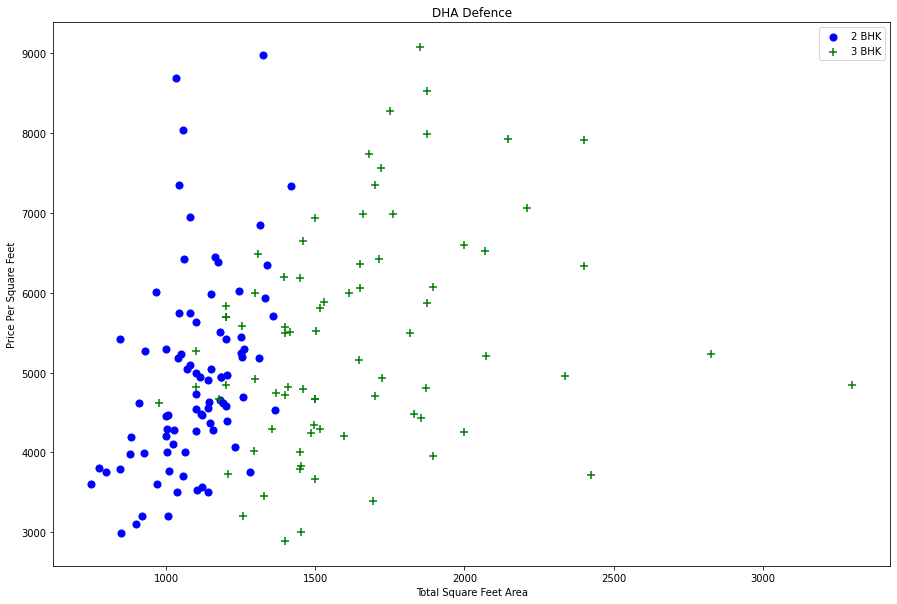

In [ ]:
plot_scatter_chart(df7,"DHA Defence")

In [ ]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

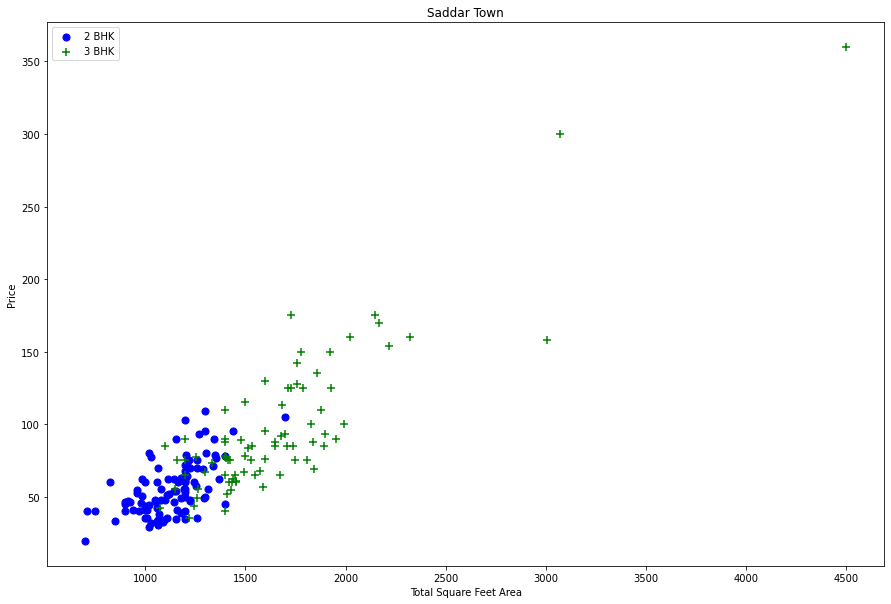

In [ ]:
plot_scatter_chart(df7,"Saddar Town")

**we should also remove properties where for same location, the price of(for example) 3 bedroom appartment is less than 2 bedroom appartment(with same square ft area).what we will do is for a given location, we will build a dictionary of stats per bhk i.e.**

 {
  '1' :{
      'mean': 4000,
      'std': 2000,
      'count': 34
      ),
'2' :{
      'mean': 4300,
      'std': 2300,
      'count': 22
      ),
 }

**now we can remove these 2BHK appartments whose price_per_sqft is less than mean price_per_sqft of 1BHK**





In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(6742, 7)

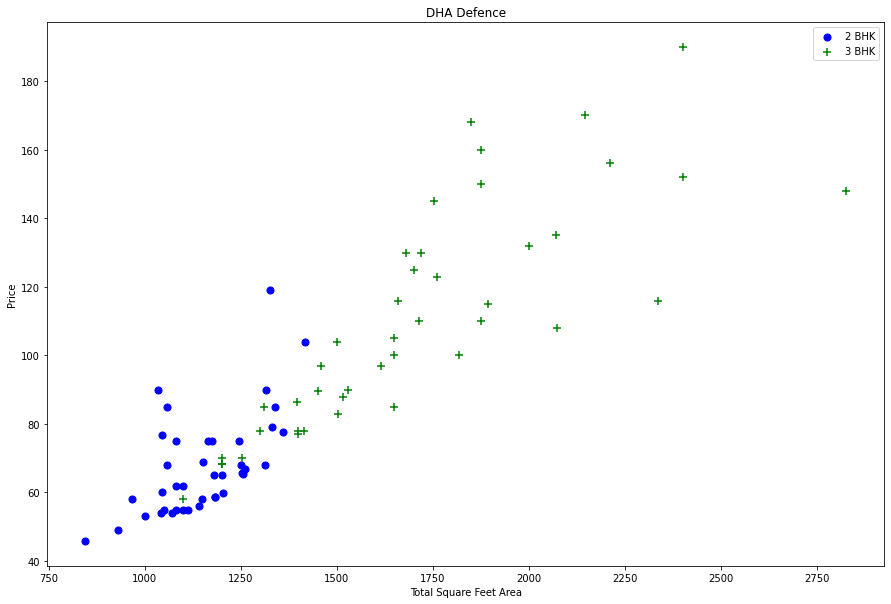

In [ ]:
plot_scatter_chart(df8,"DHA Defence")

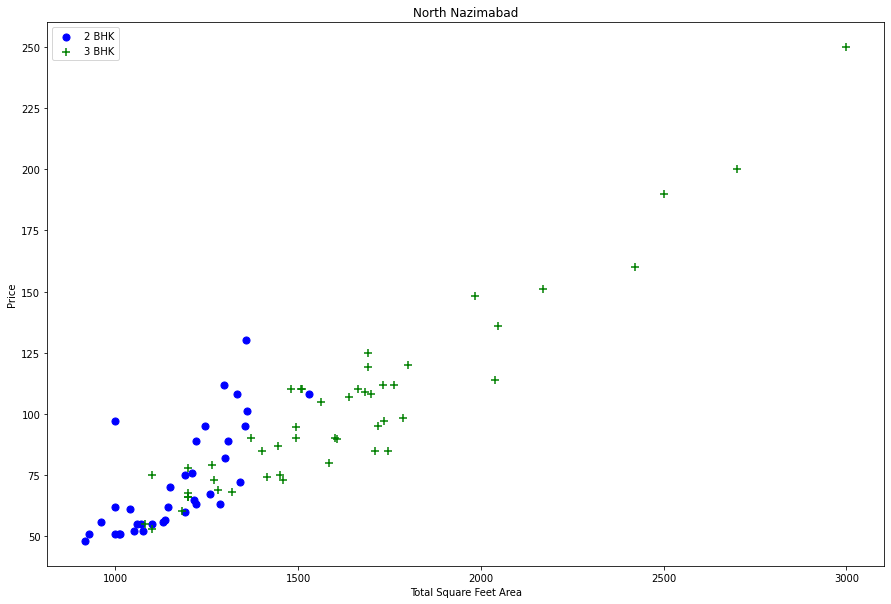

In [ ]:
plot_scatter_chart(df8,"North Nazimabad")

Text(0, 0.5, 'Count')

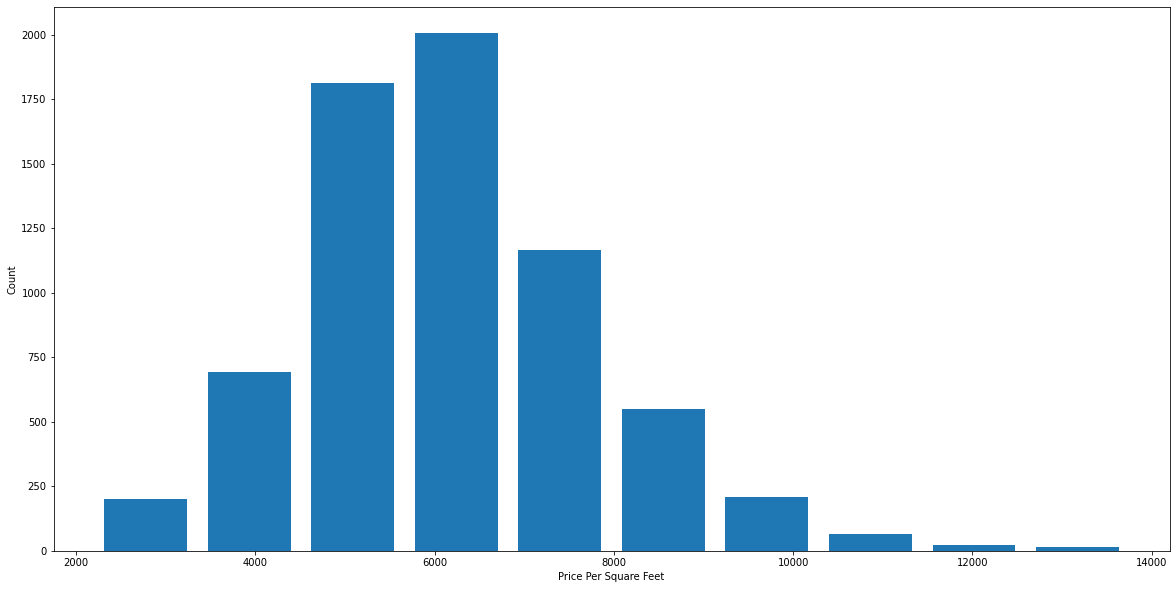

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


Outlier Removal Using Bathrooms Feature


In [ ]:
df8.bath.unique()

array([ 1.,  2.,  3.,  5.,  4.,  6.,  7.,  8.,  9., 12., 16., 13., 10.])

In [ ]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4142,Gulistan-e-Jauhar,10 BHK,12000.0,12.0,525.0,10,4375.000000
4150,Gulistan-e-Jauhar,16 BHK,10000.0,16.0,550.0,16,5500.000000
4617,Gulshan-e-Iqbal Town,10 BHK,4000.0,12.0,160.0,10,4000.000000
6007,Khaliq-uz-Zaman,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

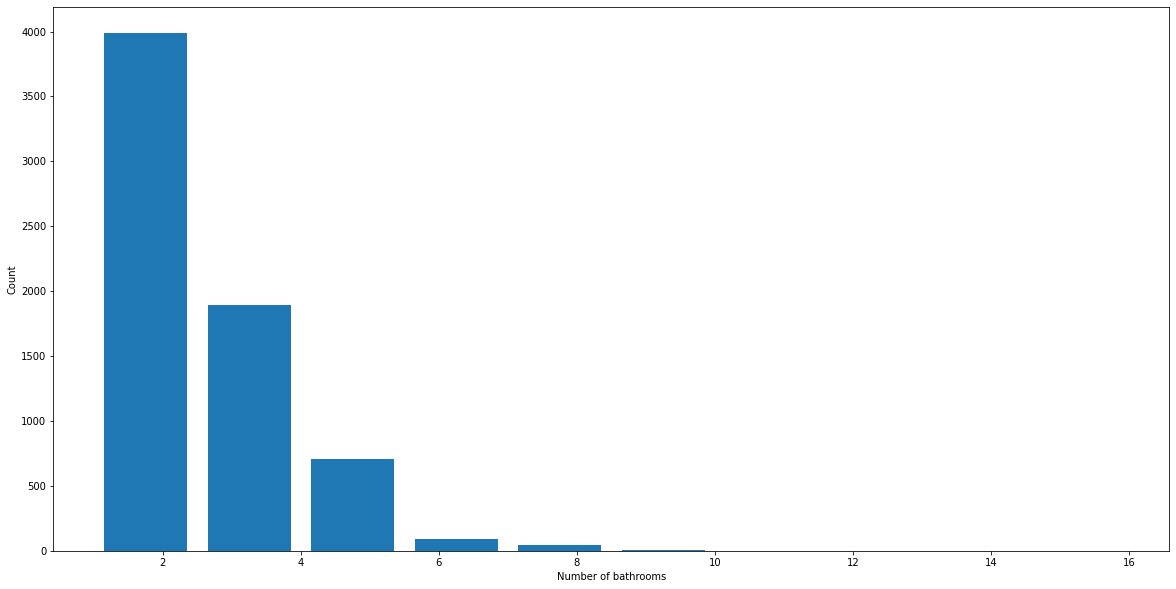

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
#unusual to have 2 more bathrooms than number of bedrooms in a home
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
560,Beach Avenue,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
9965,PECHS,3 BHK,1806.0,6.0,116.0,3,6423.034330
10835,Tariq Road,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6666, 7)

In [ ]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,North Karachi,1 BHK,510.0,1.0,25.25,1,4950.980392
6,North Karachi,2 BHK,1196.0,2.0,94.42,2,7894.648829


In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,North Karachi,510.0,1.0,25.25,1
6,North Karachi,1196.0,2.0,94.42,2
8,North Karachi,1640.0,2.0,120.00,3


**Model Building**

In [ ]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,North Karachi,Abid Town,Airport Road,Beach Avenue,Civic Centre,Clifton,Clifton Block nine,Commercial Avenue,Cornish Society Scheme,DHA Defence,DHA Phase seven,DHA Phase six,Defence Garden,Dhoraji Colony,Frere Town,Garden East,Garden West,Gohar Green City,Gulistan-e-Jauhar,Gulshan-E-Iqbal one,Gulshan-E-Iqbal two,Gulshan-e-Iqbal Town,Hill Park,I I Chundrigar Road,Jamshed Quarter,Jamshed Town,Karimabad,Kashmir Road,Kehkashan,Khalid Bin Walid Road,Khaliq-uz-Zaman,Khayaban-e-Badban,Khayaban-e-Bahria,Khayaban-e-Bukhari,Khayaban-e-Hafiz,Khayaban-e-Hilal,Khayaban-e-Ittehad,Khayaban-e-Jami,Khayaban-e-Janbaz,Khayaban-e-Muhafiz,Khayaban-e-Mujahid,Khayaban-e-Muslim,Khayaban-e-Nishat,Khayaban-e-Rahat,Khayaban-e-Sehar,Khayaban-e-Shahbaz,Khayaban-e-Shaheen,Khayaban-e-Shamsheer,Khayaban-e-Shujaat,Khayaban-e-Tanzeem,Khayaban-e-Tariq,Khayaban-e-Tauheed,Khayabane-e-Amir Khusro,Korangi Creek,Korangi Road,Malir,Mehmoodabad,Muslimabad,Napier Road,Navy Housing Scheme Karsaz,Nazimabad,North Karachi,North Nazimabad,PECHS,PIB Colony,Punjab Colony,Saba Avenue,Saddar Town,Soldier Bazar,Sunset Boulevard,Tariq Road,Zaibunnisa Street,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,North Karachi,Abid Town,Airport Road,Beach Avenue,Civic Centre,Clifton,Clifton Block nine,Commercial Avenue,Cornish Society Scheme,DHA Defence,DHA Phase seven,DHA Phase six,Defence Garden,Dhoraji Colony,Frere Town,Garden East,Garden West,Gohar Green City,Gulistan-e-Jauhar,Gulshan-E-Iqbal one,Gulshan-E-Iqbal two,Gulshan-e-Iqbal Town,Hill Park,I I Chundrigar Road,Jamshed Quarter,Jamshed Town,Karimabad,Kashmir Road,Kehkashan,Khalid Bin Walid Road,Khaliq-uz-Zaman,Khayaban-e-Badban,Khayaban-e-Bahria,Khayaban-e-Bukhari,Khayaban-e-Hafiz,Khayaban-e-Hilal,Khayaban-e-Ittehad,Khayaban-e-Jami,Khayaban-e-Janbaz,Khayaban-e-Muhafiz,Khayaban-e-Mujahid,Khayaban-e-Muslim,Khayaban-e-Nishat,Khayaban-e-Rahat,Khayaban-e-Sehar,Khayaban-e-Shahbaz,Khayaban-e-Shaheen,Khayaban-e-Shamsheer,Khayaban-e-Shujaat,Khayaban-e-Tanzeem,Khayaban-e-Tariq,Khayaban-e-Tauheed,Khayabane-e-Amir Khusro,Korangi Creek,Korangi Road,Malir,Mehmoodabad,Muslimabad,Napier Road,Navy Housing Scheme Karsaz,Nazimabad,North Karachi,North Nazimabad,PECHS,PIB Colony,Punjab Colony,Saba Avenue,Saddar Town,Soldier Bazar,Sunset Boulevard,Tariq Road,Zaibunnisa Street
0,North Karachi,510.0,1.0,25.25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,North Karachi,1196.0,2.0,94.42,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,North Karachi,1640.0,2.0,120.00,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,North Karachi,1337.0,2.0,82.00,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,North Karachi,2181.0,3.0,152.00,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,North Karachi,Abid Town,Airport Road,Beach Avenue,Civic Centre,Clifton,Clifton Block nine,Commercial Avenue,Cornish Society Scheme,DHA Defence,DHA Phase seven,DHA Phase six,Defence Garden,Dhoraji Colony,Frere Town,Garden East,Garden West,Gohar Green City,Gulistan-e-Jauhar,Gulshan-E-Iqbal one,Gulshan-E-Iqbal two,Gulshan-e-Iqbal Town,Hill Park,I I Chundrigar Road,Jamshed Quarter,Jamshed Town,Karimabad,Kashmir Road,Kehkashan,Khalid Bin Walid Road,Khaliq-uz-Zaman,Khayaban-e-Badban,Khayaban-e-Bahria,Khayaban-e-Bukhari,Khayaban-e-Hafiz,Khayaban-e-Hilal,Khayaban-e-Ittehad,Khayaban-e-Jami,Khayaban-e-Janbaz,Khayaban-e-Muhafiz,Khayaban-e-Mujahid,Khayaban-e-Muslim,Khayaban-e-Nishat,Khayaban-e-Rahat,Khayaban-e-Sehar,Khayaban-e-Shahbaz,Khayaban-e-Shaheen,Khayaban-e-Shamsheer,Khayaban-e-Shujaat,Khayaban-e-Tanzeem,Khayaban-e-Tariq,Khayaban-e-Tauheed,Khayabane-e-Amir Khusro,Korangi Creek,Korangi Road,Malir,Mehmoodabad,Muslimabad,Napier Road,Navy Housing Scheme Karsaz,Nazimabad,North Karachi,North Nazimabad,PECHS,PIB Colony,Punjab Colony,Saba Avenue,Saddar Town,Soldier Bazar,Sunset Boulevard,Tariq Road,Zaibunnisa Street
0,510.0,1.0,25.25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1196.0,2.0,94.42,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Build a new model
df12.shape

(6666, 76)

In [ ]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,North Karachi,Abid Town,Airport Road,Beach Avenue,Civic Centre,Clifton,Clifton Block nine,Commercial Avenue,Cornish Society Scheme,DHA Defence,DHA Phase seven,DHA Phase six,Defence Garden,Dhoraji Colony,Frere Town,Garden East,Garden West,Gohar Green City,Gulistan-e-Jauhar,Gulshan-E-Iqbal one,Gulshan-E-Iqbal two,Gulshan-e-Iqbal Town,Hill Park,I I Chundrigar Road,Jamshed Quarter,Jamshed Town,Karimabad,Kashmir Road,Kehkashan,Khalid Bin Walid Road,Khaliq-uz-Zaman,Khayaban-e-Badban,Khayaban-e-Bahria,Khayaban-e-Bukhari,Khayaban-e-Hafiz,Khayaban-e-Hilal,Khayaban-e-Ittehad,Khayaban-e-Jami,Khayaban-e-Janbaz,Khayaban-e-Muhafiz,Khayaban-e-Mujahid,Khayaban-e-Muslim,Khayaban-e-Nishat,Khayaban-e-Rahat,Khayaban-e-Sehar,Khayaban-e-Shahbaz,Khayaban-e-Shaheen,Khayaban-e-Shamsheer,Khayaban-e-Shujaat,Khayaban-e-Tanzeem,Khayaban-e-Tariq,Khayaban-e-Tauheed,Khayabane-e-Amir Khusro,Korangi Creek,Korangi Road,Malir,Mehmoodabad,Muslimabad,Napier Road,Navy Housing Scheme Karsaz,Nazimabad,North Karachi,North Nazimabad,PECHS,PIB Colony,Punjab Colony,Saba Avenue,Saddar Town,Soldier Bazar,Sunset Boulevard,Tariq Road,Zaibunnisa Street
0,510.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1196.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1640.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(6666, 75)

In [ ]:
y = df12.price
y.head(3)

0     25.25
6     94.42
8    120.00
Name: price, dtype: float64

In [ ]:
len(y)

6666

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8995746223240628

K Fold cross validation

In [ ]:
# K Fold cross validation to measure accuracy of our LinearRegression model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84261516, 0.84600533, 0.82265115, 0.80939023, 0.83235991])

We can see that in 5 iterations we get a score above 80% all the time. 
This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [ ]:
#Find best model using GridSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,0.830604,{'normalize': False}
1,lasso,0.820766,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.763003,"{'criterion': 'friedman_mse', 'splitter': 'best'}"




Based on above results we can say that LinearRegression gives the best score. Hence we will use that.


**Test the model for few properties**


In [ ]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' North Karachi', 'Abid Town',
       'Airport Road', 'Beach Avenue', 'Civic Centre', 'Clifton',
       'Clifton Block nine', 'Commercial Avenue', 'Cornish Society Scheme ',
       'DHA Defence', 'DHA Phase seven', 'DHA Phase six', 'Defence Garden',
       'Dhoraji Colony', 'Frere Town', 'Garden East', 'Garden West',
       'Gohar Green City', 'Gulistan-e-Jauhar ', 'Gulshan-E-Iqbal one',
       'Gulshan-E-Iqbal two', 'Gulshan-e-Iqbal Town', 'Hill Park',
       'I I Chundrigar Road', 'Jamshed Quarter', 'Jamshed Town ', 'Karimabad',
       'Kashmir Road', 'Kehkashan', 'Khalid Bin Walid Road', 'Khaliq-uz-Zaman',
       'Khayaban-e-Badban', 'Khayaban-e-Bahria', 'Khayaban-e-Bukhari',
       'Khayaban-e-Hafiz', 'Khayaban-e-Hilal', 'Khayaban-e-Ittehad',
       'Khayaban-e-Jami', 'Khayaban-e-Janbaz', 'Khayaban-e-Muhafiz',
       'Khayaban-e-Mujahid', 'Khayaban-e-Muslim', 'Khayaban-e-Nishat',
       'Khayaban-e-Rahat', 'Khayaban-e-Sehar', 'Khayaban-e-Shahbaz'

In [ ]:
np.where(X.columns=='Mehmoodabad')[0][0]


59

In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('PECHS',1000, 2, 2)

56.689047090515004

In [ ]:
predict_price('Beach Avenue',1000, 3, 3)

49.05586698621805

In [ ]:
predict_price('Saddar Town',1000, 2, 2)

66.53315993871176

In [ ]:
predict_price('Beach Avenue',1000, 2, 3)

43.2427192305374